In [1]:
from netCDF4 import Dataset
import netCDF4
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np
import xarray as xr
from datetime import datetime, timezone
import nc_time_axis

atmos_epoch = datetime(1900, 1, 1, 0, 0, tzinfo=timezone.utc)

In [2]:
ukesm_final = Dataset('../data/ukesm/500zg_day_UKESM1-0-LL_piControl_r1i1p1f2_gn_19600101-20601230_NHML_JJAextd.nc_1x1_final.nc', mode='r')
xr_ukesm_final = xr.open_dataset(xr.backends.NetCDF4DataStore(ukesm_final), decode_times=True)
ukesm_labels = Dataset('../data/labels/GTD_UKESM1-0-LL_piControl_1960-2060_JJAextd.nc', mode='r')

In [6]:
long = xr_ukesm_final.longitude.data
lat = xr_ukesm_final.latitude.data
zg = xr_ukesm_final.z_0001.data
time = xr_ukesm_final.time.data

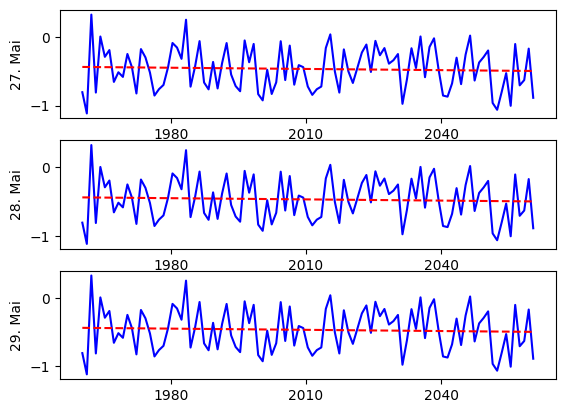

In [18]:
num = 3
for i in range(num):
    y = np.mean(xr_ukesm_final.z_0001[::98, 0], axis=(1,2))
    tmp_time = time[i::98]
    x = np.arange(len(y))
    coef = np.polyfit(x, y,1)
    poly1d_fn = np.poly1d(coef) 

    plt.subplot(num, 1, i+1)
    plt.ylabel(str(time[i].day) + ". Mai")
    plt.plot(tmp_time, y, 'b-')
    plt.plot(tmp_time, poly1d_fn(x), 'r--')
plt.show()

# num = 3
# for i in range(num):
#     y = np.mean(zg_final[i::98, 0], axis=(1, 2))
#     tmp_time = time_final[i::98]
#     x = np.arange(len(y))
#     coef = np.polyfit(x, y,1)
#     poly1d_fn = np.poly1d(coef) 

#     plt.subplot(num, 1, i+1)
#     plt.ylabel(str(time_final[i].day) + ". Mai")
#     plt.plot(tmp_time, y, 'b-')
#     plt.plot(tmp_time, poly1d_fn(x), 'r--')
#     plt.plot(tmp_time, (y-poly1d_fn(x)), 'g-')
#     plt.plot(tmp_time, poly1d_fn((y-poly1d_fn(x))), 'y--')
# plt.show()

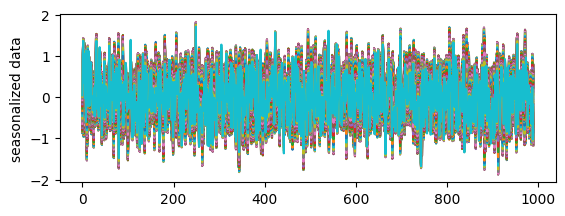

In [19]:
plt.subplot(2, 1, 1)
plt.ylabel("seasonalized data")
plt.plot(np.mean(zg[::10], axis=(1, 2)))

In [20]:
# year 1995-2000 compared between normal data and de-seasonalized data

year_start = datetime(year=1995, month=1, day=1)
year_end = datetime(year=2000, month=12, day=31)

date_mask = (time >= year_start) & (time <= year_end)

plt.subplot(2, 1, 1)
plt.plot(np.mean(zg[date_mask], axis=(1, 2)))

plt.subplot(2, 1, 2)
plt.plot(np.mean(zg[date_mask, 0], axis=(1, 2)))

plt.show()

TypeError: cannot compare cftime.Datetime360Day(1960, 5, 27, 0, 0, 0, 0, has_year_zero=True) and datetime.datetime(1995, 1, 1, 0, 0) (different calendars)

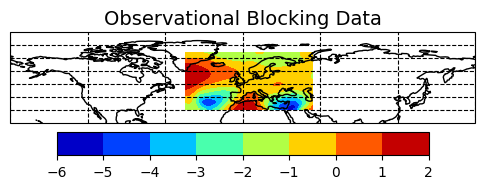

In [22]:
# plot observational data onto worldmap

fig = plt.figure(figsize=(6, 6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-180, 180, 20, 90], crs=ccrs.PlateCarree())
ax.coastlines(resolution="110m",linewidth=1)
ax.gridlines(linestyle='--',color='black')

plt.contourf(long[:], lat[:], zg[0, 0], transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
plt.title('Observational Blocking Data', size=14)
cb = plt.colorbar(ax=ax, orientation="horizontal", pad=0.02, aspect=16, shrink=0.8)
cb.ax.tick_params(labelsize=10)

TypeError: cannot compare cftime.Datetime360Day(1960, 5, 27, 0, 0, 0, 0, has_year_zero=True) and Timestamp('1979-06-01 00:00:00') (different calendars)

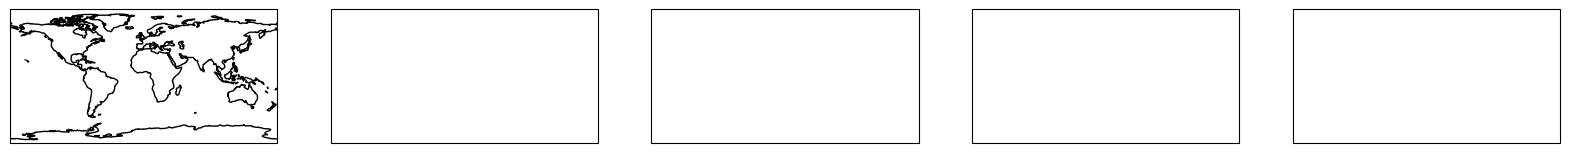

In [23]:
fig, axs = plt.subplots(nrows=1,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20, 20))

axs = axs.flatten()

clevs=np.arange(-5,5,1)


for i in range(5):
    time = datetime(year=1979, month=6, day=1 + i)
    axs[i].coastlines(resolution="110m",linewidth=1)
    cs = axs[i].contourf(long, lat, xr_ukesm_final.sel(time=time, method="nearest").z_0001.to_numpy()[0], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
    axs[i].set_title(str(time))


# for j in range(5):
#     axs[i*5 + j].coastlines(resolution="110m",linewidth=1)

#     cs = axs[i*5 + j].contourf(long[:], lat[:], observational_final.variables["z_0001"][idx, j], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
#     axs[i*5 + j].set_title(f_time[idx + j].strftime('%Y-%m-%d') + (" block: " + str(observational_labels.variables["blocking"][idx + j])))

cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')

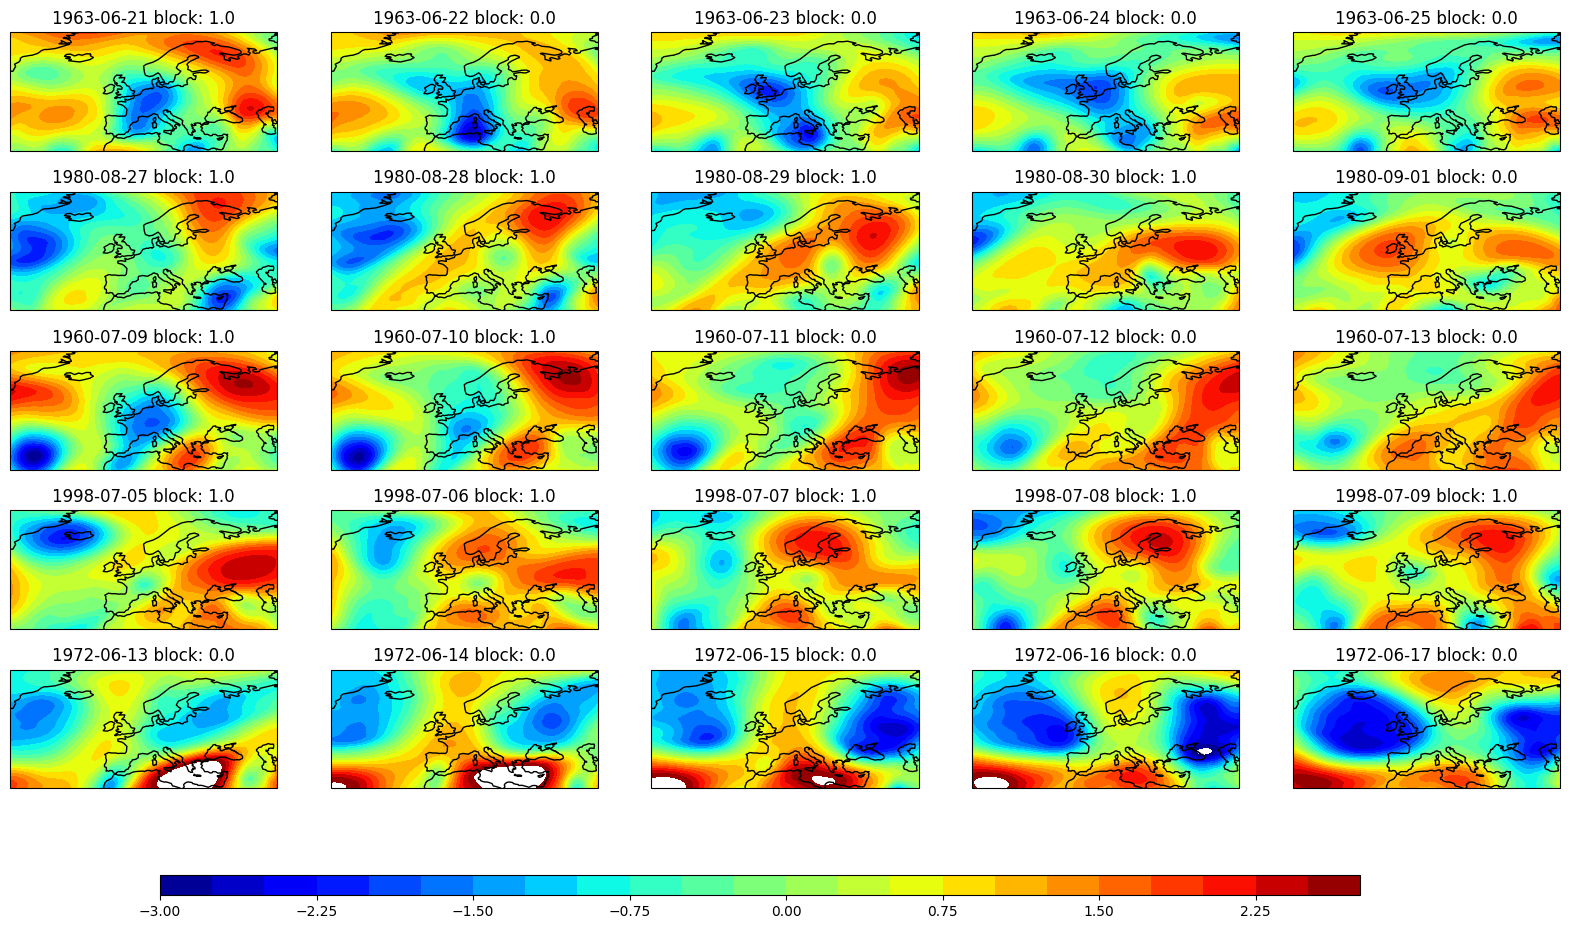

In [28]:
import random

fig, axs = plt.subplots(nrows=5,ncols=5,
                        subplot_kw={'projection': ccrs.PlateCarree()},
                        figsize=(20, 10))

axs = axs.flatten()

clevs=np.arange(-3,3,0.25)

f_time = netCDF4.num2date(ukesm_final.variables["time"], ukesm_final.variables["time"].units, ukesm_final.variables["time"].calendar)

for i in range(5):
    idx = random.randint(0, 4017)
    for j in range(5):
        axs[i*5 + j].coastlines(resolution="110m",linewidth=1)

        cs = axs[i*5 + j].contourf(long[:], lat[:], ukesm_final.variables["z_0001"][idx, j], clevs, transform=ccrs.PlateCarree(),cmap=plt.cm.jet)
        axs[i*5 + j].set_title(f_time[idx + j].strftime('%Y-%m-%d') + (" block: " + str(ukesm_labels.variables["blocking"][idx + j])))

cbar_ax = fig.add_axes([0.2, 0.01, 0.6, 0.02])
cbar=fig.colorbar(cs, cax=cbar_ax,orientation='horizontal')